***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('./dados.csv')

### Visualize o conteúdo do DataFrame

In [5]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [3]:
freq_dist_cat = [dados.Renda.min(), 788*2, 788*5, 788*15, 788*25, dados.Renda.max()]
freq_dist_cat

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [4]:
freq_dist_cat_labels = ['E', 'D', 'C', 'B', 'A']
freq_dist_cat_labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [5]:
freq_dist_value_counts = pd.value_counts(
    pd.cut(x = dados.Renda, bins = freq_dist_cat, labels = freq_dist_cat_labels, include_lowest = True)
)
freq_dist_value_counts

/tmp/ipykernel_749/4030944532.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_dist_value_counts = pd.value_counts(


Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [6]:
freq_dist_percentages = pd.value_counts(
    pd.cut(x = dados.Renda, bins = freq_dist_cat, labels = freq_dist_cat_labels, include_lowest = True),
    normalize = True
) * 100
freq_dist_percentages

/tmp/ipykernel_749/3748315975.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_dist_percentages = pd.value_counts(


Renda
E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [7]:
freq_dist_df = pd.DataFrame({'Frequencia': freq_dist_value_counts, 'Percentual': freq_dist_percentages}).sort_index(ascending=False)
freq_dist_df

,Frequencia,Percentual
Renda,,
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: ylabel='Renda'>

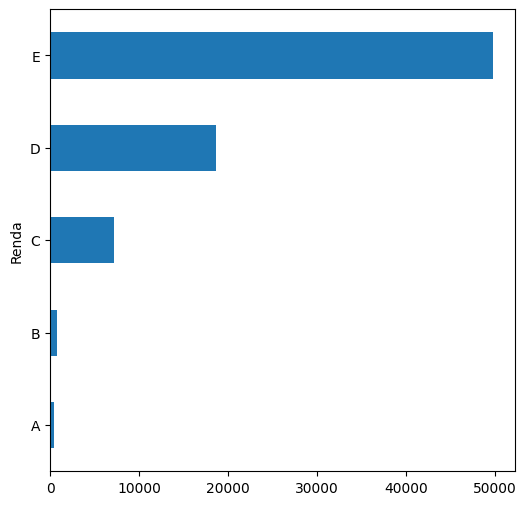

In [11]:
freq_dist_df.Frequencia.plot(kind='barh', figsize=(6,6))

<Axes: xlabel='Renda'>

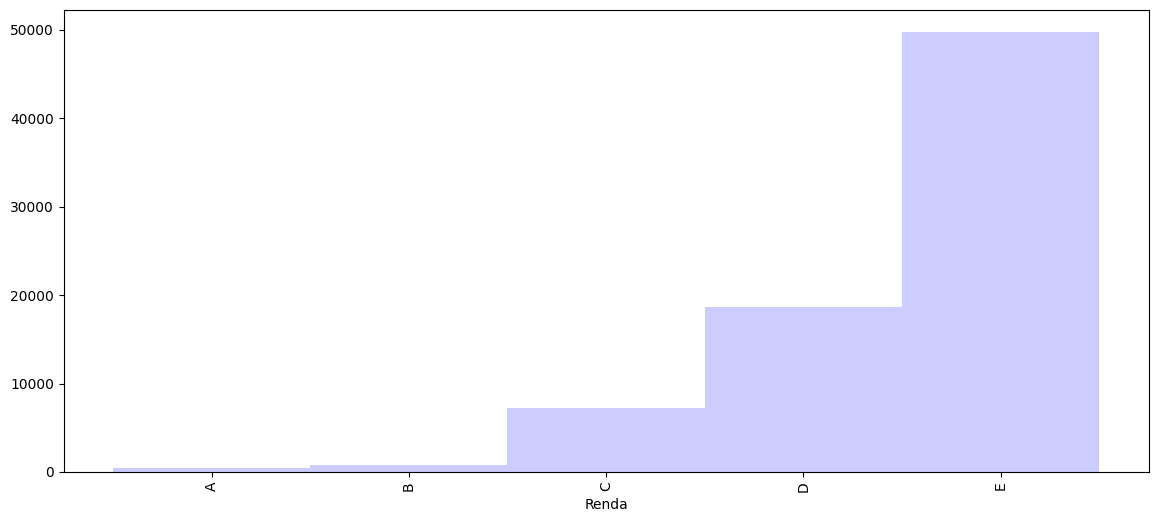

In [10]:
freq_dist_df.Frequencia.plot.bar(width = 1, color='blue', alpha=0.2, figsize=(14,6))

> ### Conclusões

A grande maioria da população entrevistada sobrevive com menos de 5 salários mínimos(considerando R$788,00).



### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [18]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


<Axes: xlabel='Idade', ylabel='Count'>

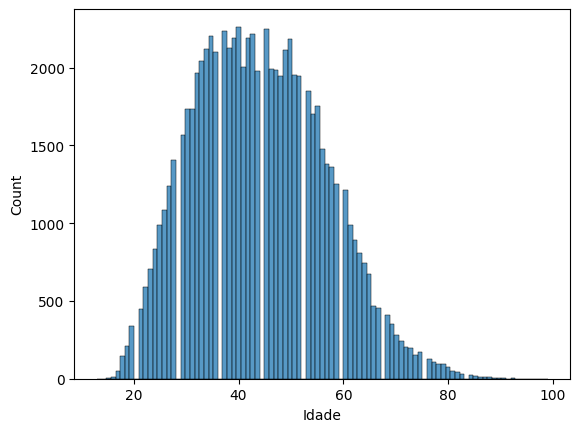

In [20]:
sns.histplot(dados.Idade)

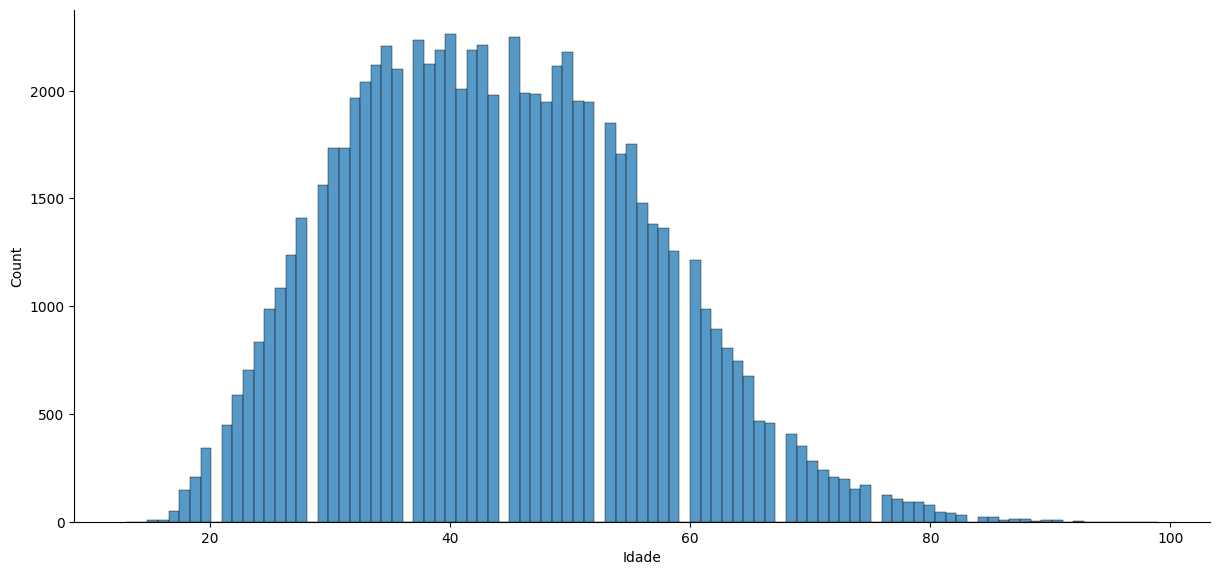

In [16]:
ax = sns.displot(dados.Idade)
ax.figure.set_size_inches(14,6)
ax

<Axes: xlabel='Anos de Estudo', ylabel='Count'>

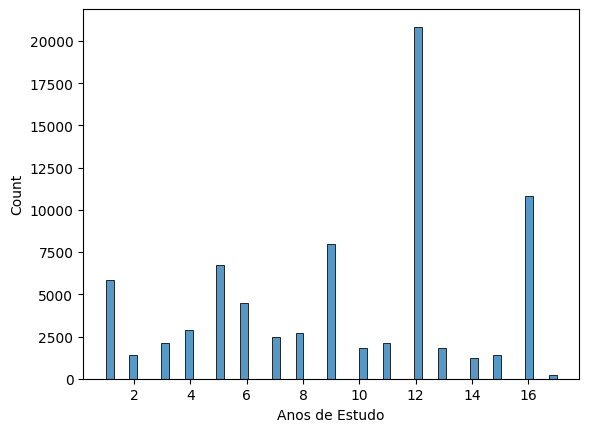

In [21]:
sns.histplot(dados['Anos de Estudo'])

<Axes: xlabel='Renda', ylabel='Count'>

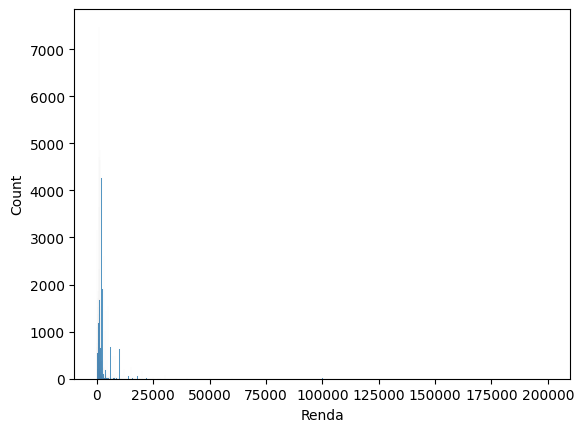

In [24]:
sns.histplot(dados.Renda)

> ### Conclusões

#### Idade:
Leve assimetria à direita.
Alguma relação com a tendencia de idosos não mais sendo responsáveis pelo sustento da casa?
Porém a assimetria é muito leve, e mostra que responsáveis pelos lares se encontram principalmente entre 30 e 60 anos.

#### Anos de Estudo:
Forte assimetria a esquerda. Porém, dispersa.
Mostra uma minoria tendo mais de 10 anos de estudos.

#### Renda:
Forte assimetria a direita.
Mostra que a maior parte da população sobrevive com menos de 5000 reais por mês.

Comparando anos de estudo com a renda, é compreensível o espelho das simetrias.

---

**Nota**: Ignorada a coluna Altura por ser um dado falso.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Axes: xlabel='Renda', ylabel='Count'>

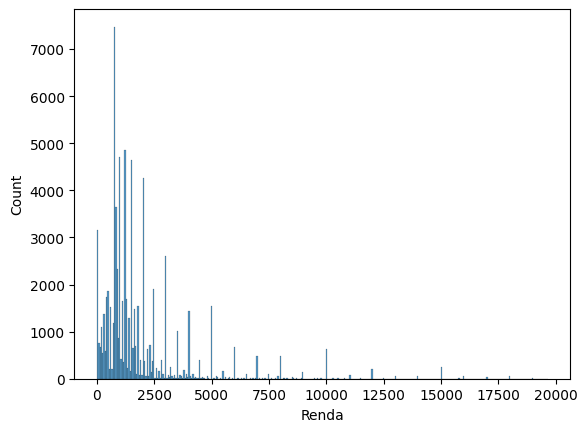

In [25]:
sns.histplot(dados.Renda[dados.Renda < 20000])

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [17]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [18]:
dados.Sexo.replace(sexo, inplace=True)
dados.head()

/tmp/ipykernel_749/1457132106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados.Sexo.replace(sexo, inplace=True)


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,Masculino,23,8,12,800,1.603808
1,11,Feminino,23,2,12,1150,1.739790
2,11,Feminino,35,8,15,880,1.760444
3,11,Masculino,46,2,6,3500,1.783158
4,11,Feminino,47,8,9,150,1.690631


In [19]:
dados.Cor = dados.Cor.replace(cor)
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,Masculino,23,Parda,12,800,1.603808
1,11,Feminino,23,Branca,12,1150,1.739790
2,11,Feminino,35,Parda,15,880,1.760444
3,11,Masculino,46,Branca,6,3500,1.783158
4,11,Feminino,47,Parda,9,150,1.690631


In [20]:
dados['Anos de Estudo'] = dados['Anos de Estudo'].replace(anos_de_estudo)
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,Masculino,23,Parda,11 anos,800,1.603808
1,11,Feminino,23,Branca,11 anos,1150,1.739790
2,11,Feminino,35,Parda,14 anos,880,1.760444
3,11,Masculino,46,Branca,5 anos,3500,1.783158
4,11,Feminino,47,Parda,8 anos,150,1.690631


In [21]:
dados.UF = dados.UF.replace(uf)
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,11 anos,800,1.603808
1,Rondônia,Feminino,23,Branca,11 anos,1150,1.739790
2,Rondônia,Feminino,35,Parda,14 anos,880,1.760444
3,Rondônia,Masculino,46,Branca,5 anos,3500,1.783158
4,Rondônia,Feminino,47,Parda,8 anos,150,1.690631


In [22]:
pd.crosstab(dados.Sexo, dados.Cor)

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [9]:
pd.crosstab(dados.Sexo, dados.Cor, normalize=True) * 100

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.152264,12.520822,0.131442,14.135867,3.759761
Masculino,0.305830,28.883394,0.333160,32.617126,7.160333


> ### Conclusões

- A maioria dos responsáveis pelos lares são homens da cor Branca ou Parda.
- O padrão se repete para o sexo feminino, sendo Brancas e Pardas a maioria.
- Só depois de homens e mulheres brancos e pardos é que vém os Negros, Amarelos e Indígenas, em order similar entre os sexos.
- A discrepância entre as cores pode vir de uma questão histórico-social do país, considerando a escravatura com os negros, a aniquilação e desapropriação cultural dos indígenas e as más condições sociais de muitos dos imigrantes asiáticos.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [3]:
media = dados.Renda.mean()
media

2000.3831988547631

In [4]:
dados.Renda.sum() / dados.Renda.count()

2000.3831988547631

### Obtenha a mediana

In [5]:
dados.Renda.count()

76840

In [6]:
dados.Renda.median()

1200.0

In [9]:
posicao_mediana = dados.Renda.count() / 2
posicao_mediana

38420.0

In [17]:
renda_ordenada = dados.Renda.sort_values(ascending=True).reset_index(drop=True)
renda_ordenada

0             0
1             0
2             0
3             0
4             0
          ...  
76835    100000
76836    120000
76837    200000
76838    200000
76839    200000
Name: Renda, Length: 76840, dtype: int64

In [18]:
renda_ordenada.loc[posicao_mediana - 1]

1200

In [19]:
renda_ordenada[posicao_mediana]

1200

In [20]:
mediana = (renda_ordenada[posicao_mediana - 1] + renda_ordenada[posicao_mediana]) / 2
mediana

1200.0

In [21]:
dados.Renda.quantile()

1200.0

### Obtenha a moda

In [22]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [23]:
desvio_medio_absoluto = abs(dados.Renda - dados.Renda.mean()).mean()
desvio_medio_absoluto

1526.4951371638058

### Obtenha a variância

In [24]:
dados.Renda.var()

11044906.006217021

In [25]:
(((dados.Renda - dados.Renda.mean()).pow(2)).sum()) / (dados.Renda.count() - 1)

11044906.006217021

### Obtenha o desvio-padrão

In [26]:
dados.Renda.std()

3323.3877303464037

In [27]:
np.sqrt((((dados.Renda - dados.Renda.mean()).pow(2)).sum()) / (dados.Renda.count() - 1))

3323.3877303464037

In [28]:
np.sqrt(dados.Renda.var())

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [36]:
pd.crosstab(dados.Sexo, dados.Cor, aggfunc={'mean', 'median', 'max'}, values=dados.Renda)

max                                         mean               \
Cor       Amarela  Branca Indígena   Parda  Preta      Amarela       Branca   
Sexo                                                                          
Feminino    20000  100000   120000   30000  23000  3027.341880  2109.866750   
Masculino   50000  200000    10000  100000  50000  4758.251064  2925.744435   

                                                  median                   \
Cor           Indígena        Parda        Preta Amarela  Branca Indígena   
Sexo                                                                        
Feminino   2464.386139  1176.758516  1134.596400  1500.0  1200.0    788.0   
Masculino  1081.710938  1659.577425  1603.861687  2800.0  1700.0    797.5   

                           
Cor         Parda   Preta  
Sexo                       
Feminino    800.0   800.0  
Masculino  1200.0  1200.0

> ### Conclusões

A tendência de homens com renda maior que mulheres continua visível, sendo as únicas excessões as rendas máxima e média de indígenas. Seria isso um outlier puxando os valores indígenas femininos para cima?
Considerando que anteriormente plotamos o histograma de renda e que consideramos qualquer calor acima de 20/25 mil como outlier... eu diria que sim.
A observação anterior sobre homens e mulheres brancos e pardos tendo maiores condições de renda não é muito visível nesta representação se olharmos nas colunas de média e mediana. E só se pode ter uma idéia disso através das colunas de máximas. Daí o fato de medidas de tendência central não representarem a realidade dos dados.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [19]:
pd.crosstab(dados.Sexo, dados.Cor, aggfunc={'var', 'std'}, values=dados.Renda)

std                                                       \
Cor           Amarela       Branca      Indígena        Parda        Preta   
Sexo                                                                         
Feminino   3731.17366  3251.013154  11957.498292  1596.233048  1349.799809   
Masculino  5740.82482  4750.791872   1204.093490  2312.087184  1936.309271   

                    var                                            \
Cor             Amarela        Branca      Indígena         Parda   
Sexo                                                                
Feminino   1.392166e+07  1.056909e+07  1.429818e+08  2.547960e+06   
Masculino  3.295707e+07  2.257002e+07  1.449841e+06  5.345747e+06   

                         
Cor               Preta  
Sexo                     
Feminino   1.821960e+06  
Masculino  3.749294e+06

In [21]:
dados.groupby(['Sexo', 'Cor'])[['Renda']].var().rename(columns={"Renda": "Var"})

Var
Sexo      Cor                   
Feminino  Amarela   1.392166e+07
          Branca    1.056909e+07
          Indígena  1.429818e+08
          Parda     2.547960e+06
          Preta     1.821960e+06
Masculino Amarela   3.295707e+07
          Branca    2.257002e+07
          Indígena  1.449841e+06
          Parda     5.345747e+06
          Preta     3.749294e+06

In [22]:
dados.groupby(['Sexo', 'Cor'])[['Renda']].std().rename(columns={"Renda": "Std"})

Std
Sexo      Cor                   
Feminino  Amarela    3731.173660
          Branca     3251.013154
          Indígena  11957.498292
          Parda      1596.233048
          Preta      1349.799809
Masculino Amarela    5740.824820
          Branca     4750.791872
          Indígena   1204.093490
          Parda      2312.087184
          Preta      1936.309271

In [25]:
def mad(x):
    return np.abs(x - x.mean()).mean()

dados.groupby(['Sexo', 'Cor'])[['Renda']].agg({'Renda': ['var', 'std', mad]})

Renda                           
                             var           std          mad
Sexo      Cor                                              
Feminino  Amarela   1.392166e+07   3731.173660  2549.146322
          Branca    1.056909e+07   3251.013154  1670.967106
          Indígena  1.429818e+08  11957.498292  3007.892952
          Parda     2.547960e+06   1596.233048   811.580946
          Preta     1.821960e+06   1349.799809   705.453357
Masculino Amarela   3.295707e+07   5740.824820  3709.597211
          Branca    2.257002e+07   4750.791872  2261.012346
          Indígena  1.449841e+06   1204.093490   798.910889
          Parda     5.345747e+06   2312.087184  1125.827704
          Preta     3.749294e+06   1936.309271   975.602482

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Renda', ylabel='Sexo'>

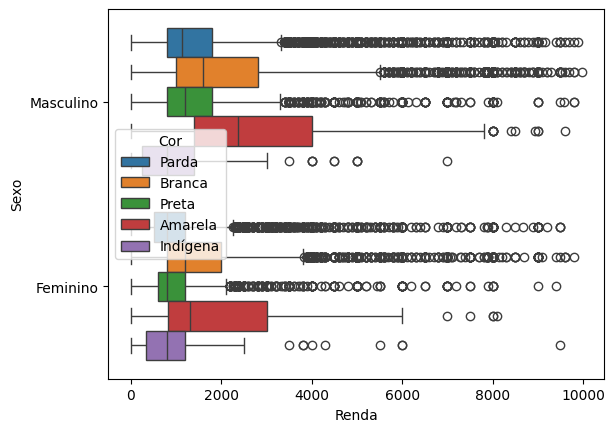

In [11]:
sns.boxplot(x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h', hue = 'Cor')

<Axes: xlabel='Renda', ylabel='Cor'>

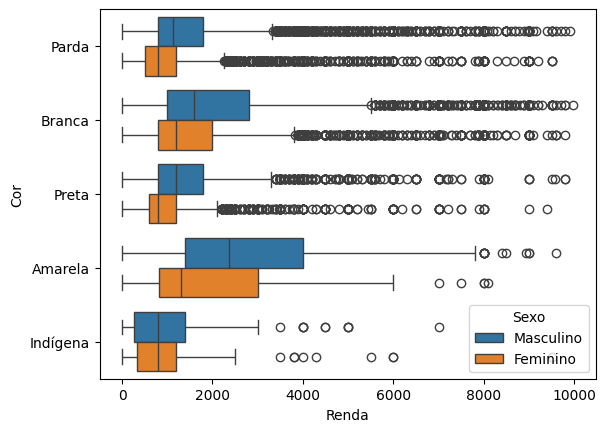

In [23]:
sns.boxplot(x = 'Renda', y = 'Cor', data = dados.query('Renda < 10000'), orient = 'h', hue = 'Sexo')

> ### Conclusões

Valores considerados outliers apresentam valores menores no sexo feminino, em qualquer cor.
Também nota-se que valores não tão elevados, acima de 3k, basicamente falando, já são, ou quase são, considerados outliers, representando a baixa renda da população num geral.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [25]:
from scipy import stats

In [26]:
stats.percentileofscore(dados.Renda, 788, kind='weak', )

28.867777199375325

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [17]:
dados.Renda.quantile(0.99, interpolation='higher')

15000

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [20]:
pd.crosstab(dados['Anos de Estudo'], dados.Sexo, aggfunc=['mean', 'median', 'max', 'std'], values=dados.Renda)

mean                median            \
Sexo                               Feminino    Masculino Feminino Masculino   
Anos de Estudo                                                                
1 ano                            492.771987   895.629047    400.0     788.0   
10 anos                          925.919225  1731.270847    800.0    1218.0   
11 anos                         1286.790889  2117.060504   1000.0    1500.0   
12 anos                         1682.313725  2470.330776   1200.0    1800.0   
13 anos                         1911.730047  3195.099154   1300.0    2400.0   
14 anos                         2226.460457  3706.620269   1600.0    2500.0   
15 anos ou mais                 3899.513231  6134.279790   2800.0    4000.0   
2 anos                           529.911638   931.178986    450.0     788.0   
3 anos                           546.853916  1109.203862    500.0     800.0   
4 anos                           704.279111  1302.329283    788.0    1000.0   
5 anos                           781.389776  1338.653218    788.0    1045.0   
6 anos                           833.732824  1448.875419    788.0    1200.0   
7 anos                           830.751004  1465.497940    788.0    1200.0   
8 anos                           933.615351  1639.396667    800.0    1300.0   
9 anos                           868.021700  1508.038850    788.0    1200.0   
Não determinados                 798.174419  1295.761905    788.0    1200.0   
Sem instrução e menos de 1 ano   516.201748   799.494638    390.0     700.0   

                                    max                    std               
Sexo                           Feminino Masculino     Feminino    Masculino  
Anos de Estudo                                                               
1 ano                              2000     30000   425.291842  1331.950552  
10 anos                            6000     45000   620.611907  2078.609734  
11 anos                          100000    200000  1819.040417  2676.538942  
12 anos                          120000     30000  4851.833513  2268.081538  
13 anos                           20000     25000  2053.789771  2797.116800  
14 anos                           20000     50000  2064.083336  3987.214974  
15 anos ou mais                  100000    200000  4212.770709  7447.613594  
2 anos                             4000     40000   498.234168  1435.173827  
3 anos                             3500     80000   424.124446  2143.800133  
4 anos                            10000     50000   629.553397  1419.821787  
5 anos                             8000     35000   635.782641  1484.650587  
6 anos                             6000     25000   574.547028  1476.628602  
7 anos                             9000     40000   602.038029  1419.708673  
8 anos                            18000     30000   896.781213  1515.583715  
9 anos                            20000     60000   973.221652  2137.664774  
Não determinados                   3000      7000   459.985964   979.648745  
Sem instrução e menos de 1 ano    10000     30000   639.311534  1023.904884

- A renda média dos homems é maior em qualquer faixa de estudo

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

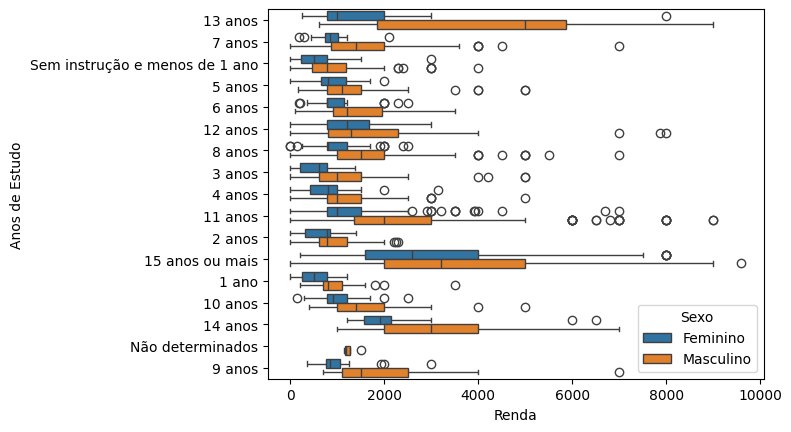

In [27]:
sns.boxplot(x = 'Renda', y = 'Anos de Estudo', data = dados.query('Renda < 10000 and Idade == 50'), orient = 'h', hue = 'Sexo')

<Axes: xlabel='Renda', ylabel='Anos de Estudo'>

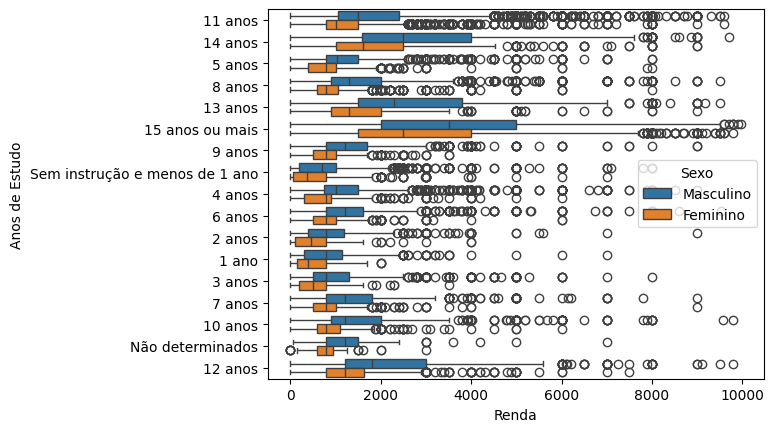

In [28]:
sns.boxplot(x = 'Renda', y = 'Anos de Estudo', data = dados.query('Renda < 10000'), orient = 'h', hue = 'Sexo')

> ### Conclusões

É gritante a baixa renda da população em geral. Vemos pouca diferença entre 0 e 6 anos de estudo. Menos ainda entre 4 e 10 anos. Mesmo os que possuem 15 ou mais anos de estudo não chegam em sua maioria a 6000 reais de renda. Sem falar o sexo feminino.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [36]:
renda_uf = dados.groupby('UF').agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_uf

Renda                             
                            mean  median     max          std
UF                                                           
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

In [37]:
renda_uf.idxmax()

Renda  mean      Distrito Federal
       median    Distrito Federal
       max                  Bahia
       std       Distrito Federal
dtype: object

In [38]:
renda_uf.idxmin()

Renda  mean      Maranhão
       median    Maranhão
       max        Alagoas
       std        Alagoas
dtype: object

- Distrito Federal tem a maior média do país, mas também apresenta a maior variação de renda.
- Alagoas possui os valores mais constantes do país.
- Maranhão possui a menor média do país.

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: xlabel='Renda', ylabel='UF'>

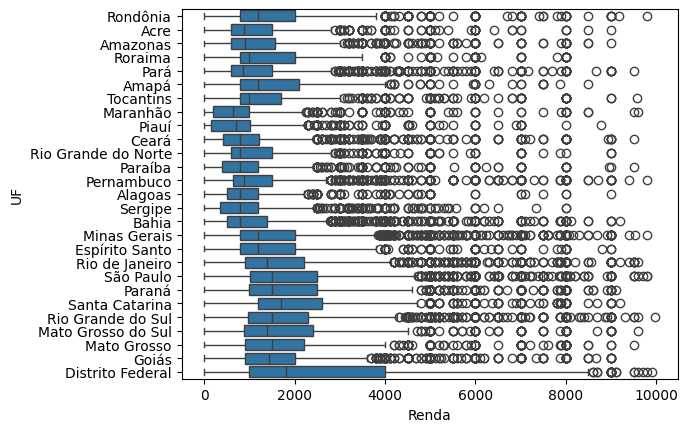

In [42]:
sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'))

> ### Conclusões

Os três pontos mencionados acima se confirmam visualmente neste gráfico.
Notamos também que Piauí está bem próximo do Maranhão em termos de renda, porém deve possuir mais valores acima do outlier, o que puxaria sua média para cima.